In [1]:
import h5py
import numpy as np
import math
import os

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
K.clear_session()
import itertools
import matplotlib.pyplot as plt
import cv2
import matplotlib.cm as cm

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

plt.rc('figure', autolayout=True)
from numpy.random import seed

seed(10)
tf.keras.utils.set_random_seed(10)
i=1
tf.__version__

'2.8.2'

In [2]:
train_dataset = h5py.File('datasets/train_signs.h5', "r")
test_dataset = h5py.File('datasets/test_signs.h5', "r")

In [3]:
x_train = np.array(train_dataset['train_set_x'])
y_train = np.array(train_dataset['train_set_y'])
x_test = np.array(test_dataset['test_set_x'])
y_test = np.array(test_dataset['test_set_y'])

In [4]:
print(type(x_train))
print(x_train.shape)


<class 'numpy.ndarray'>
(1080, 64, 64, 3)


In [5]:
unique_labels = np.unique(y_train)
print(unique_labels,len(unique_labels))

[0 1 2 3 4 5] 6


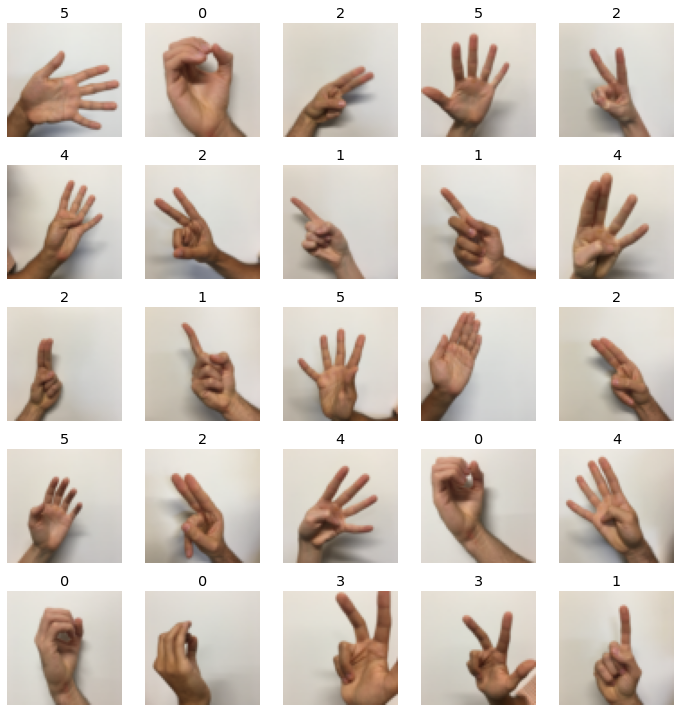

In [6]:

plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis("off")
i=0

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

Epoch 1/200
34/34 [==============================] - 5s 128ms/step - loss: 1.8034 - accuracy: 0.1806 - val_loss: 1.7845 - val_accuracy: 0.1750
Epoch 2/200
34/34 [==============================] - 4s 112ms/step - loss: 1.7878 - accuracy: 0.1778 - val_loss: 1.7797 - val_accuracy: 0.1667
Epoch 3/200
34/34 [==============================] - 4s 111ms/step - loss: 1.7796 - accuracy: 0.1889 - val_loss: 1.7669 - val_accuracy: 0.2333
Epoch 4/200
34/34 [==============================] - 4s 113ms/step - loss: 1.7699 - accuracy: 0.2361 - val_loss: 1.7547 - val_accuracy: 0.4000
Epoch 5/200
34/34 [==============================] - 4s 116ms/step - loss: 1.7642 - accuracy: 0.2574 - val_loss: 1.7445 - val_accuracy: 0.3583
Epoch 6/200
34/34 [==============================] - 2s 63ms/step - loss: 1.7494 - accuracy: 0.2815 - val_loss: 1.7299 - val_accuracy: 0.4000
Epoch 7/200
34/34 [==============================] - 2s 61ms/step - loss: 1.7332 - accuracy: 0.3037 - val_loss: 1.7132 - val_accuracy: 0.3250
E

[0.27701857686042786, 0.8916666507720947]

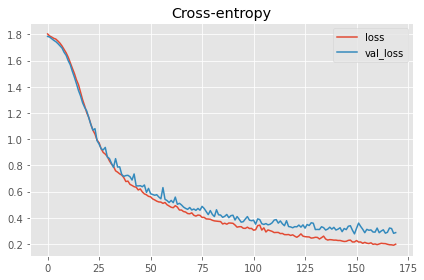

In [9]:



input_shape = x_train.shape[1:]

input_img = tf.keras.Input(shape=input_shape)
## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
Z1 = tf.keras.layers.Conv2D(filters = 8 , kernel_size= (4,4), strides = (1,1), padding='same')(input_img)
## RELU
A1 = tf.keras.layers.ReLU()(Z1)
## MAXPOOL: window 8x8, stride 8, padding 'SAME'
P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8),strides=(8,8),padding='same')(A1)
## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
Z2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2),strides=(1,1),padding='same')(P1)
## RELU
A2 = tf.keras.layers.ReLU()(Z2)
## MAXPOOL: window 4x4, stride 4, padding 'SAME'
P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4,4),padding="same")(A2)
## FLATTEN
F = tf.keras.layers.Flatten()(P2)
## Dense layer
## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
outputs = tf.keras.layers.Dense(6,activation="softmax")(F)
# YOUR CODE STARTS HERE


# YOUR CODE ENDS HERE
model = tf.keras.Model(inputs=input_img, outputs=outputs)


model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
model.evaluate(x_test, y_test)


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

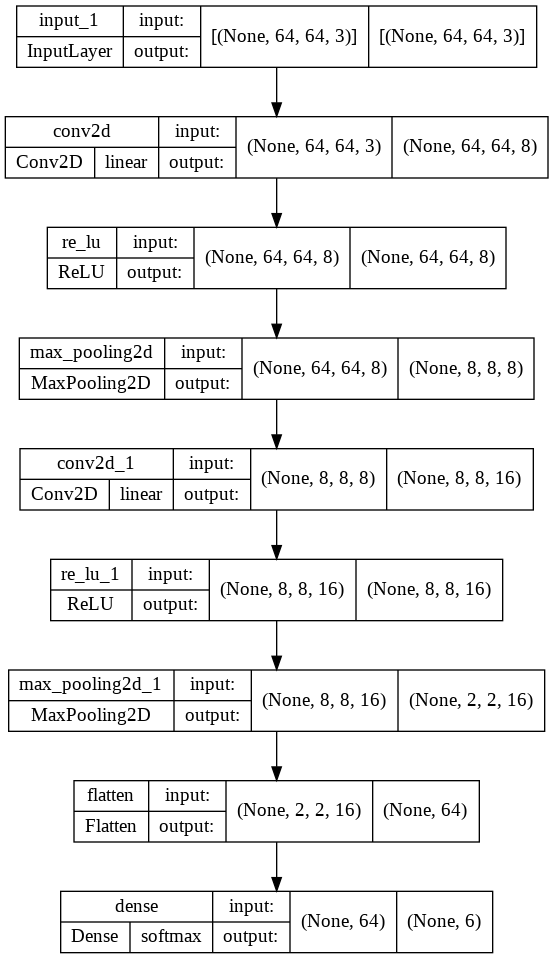

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,show_layer_activations=True)

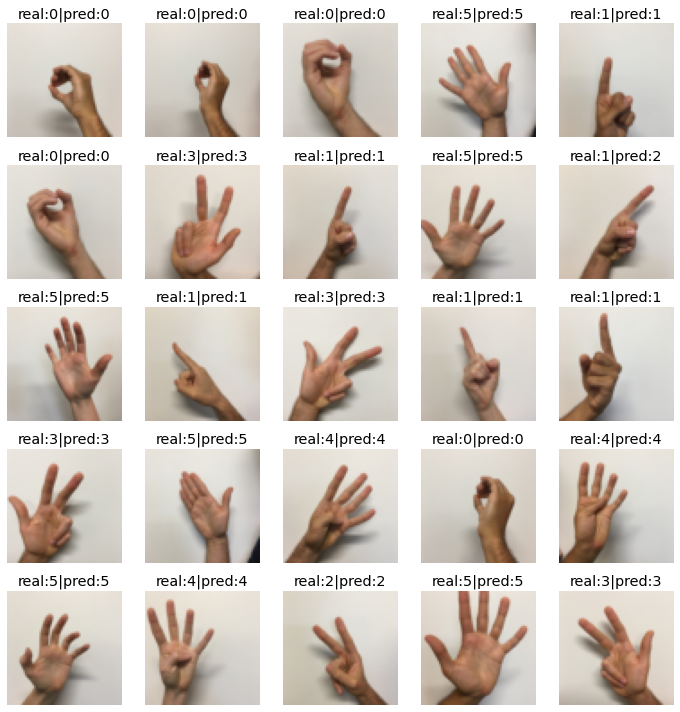

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])
    k = np.argmax(model.predict(np.array([x_test[i]])),axis=-1)[0]
    plt.title('real:{}|pred:{}'.format(y_test[i],k))
    plt.axis("off")

In [13]:
model.save('models/model_110/')


In [14]:
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba,axis=-1)

In [15]:
y_pred

array([0, 0, 0, 5, 1, 0, 3, 1, 5, 2, 5, 1, 3, 1, 1, 3, 5, 4, 0, 4, 5, 4,
       2, 5, 3, 5, 4, 1, 1, 2, 3, 1, 0, 5, 1, 1, 0, 3, 2, 3, 0, 3, 0, 2,
       3, 1, 1, 2, 0, 5, 4, 1, 2, 0, 4, 0, 4, 0, 4, 4, 5, 5, 2, 4, 4, 5,
       0, 1, 3, 3, 0, 5, 3, 1, 3, 4, 3, 5, 1, 5, 2, 0, 1, 3, 2, 4, 4, 1,
       4, 5, 5, 0, 0, 5, 5, 5, 3, 4, 5, 2, 2, 2, 0, 2, 5, 3, 0, 2, 3, 4,
       1, 3, 2, 4, 2, 2, 1, 3, 2, 3])

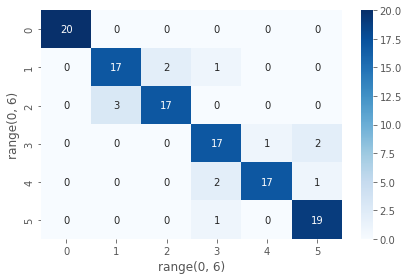

In [16]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat
import seaborn as sns
sns.heatmap(conf_mat,annot=True,cmap='Blues')
plt.xlabel(range(0,6))
plt.ylabel(range(0,6))
plt.show()

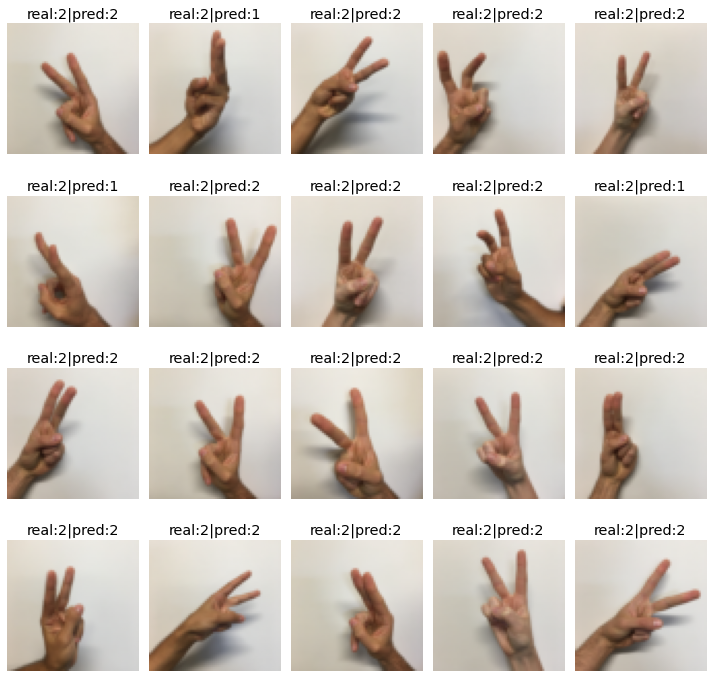

In [17]:
plt.figure(figsize=(10, 10))
count = 1
for i in range(len(y_test)):
  if y_test[i]==2:
      ax = plt.subplot(4, 5, count)
      plt.imshow(x_test[i])
      # k = np.argmax(model.predict(np.array([x_test[i]])),axis=-1)[0]
      plt.title('real:{}|pred:{}'.format(y_test[i],y_pred[i]))
      plt.axis("off")
      count+=1